In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

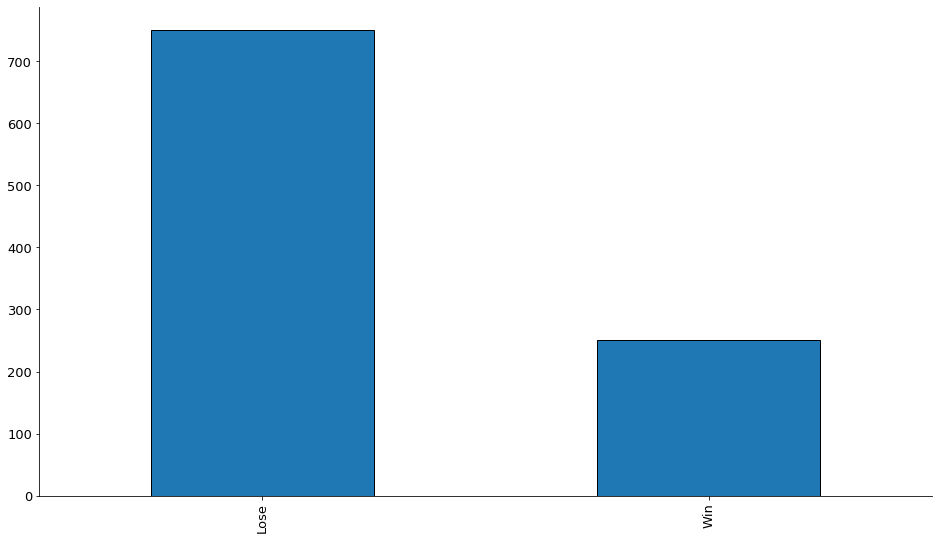

In [34]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()

In [26]:
n = 25
tickets.sample(n).mean()

0.24

In [28]:
[tickets.sample(n).mean() for _ in range(5)]

[0.32, 0.4, 0.4, 0.4, 0.2]

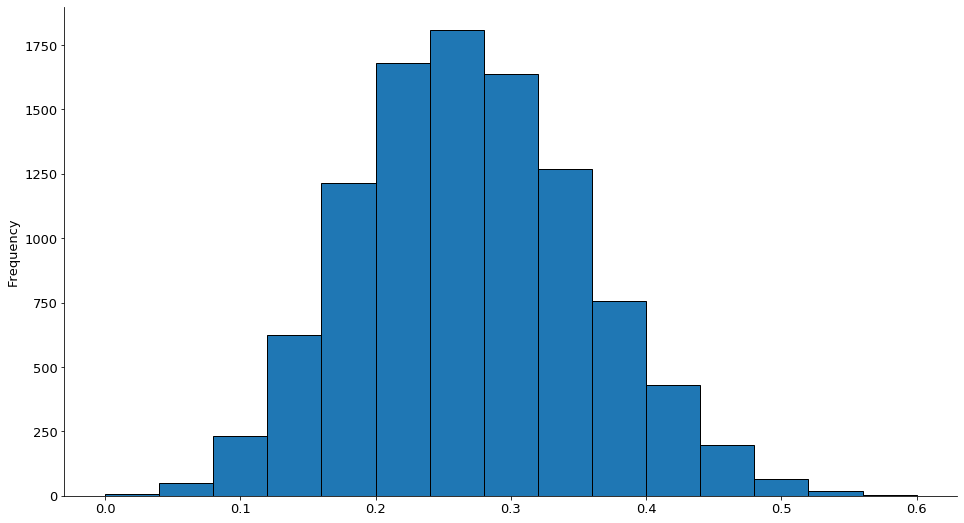

In [38]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10000)])
calculated_winrates.plot.hist(bins=15)

### Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls

The average value for an individual 6 sided die is 3.5 so the average of 6 dice rolls should be 3.5

### Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.


In [46]:
die = pd.Series([1, 2, 3, 4, 5, 6])
die.sample(1).sum()

1

In [63]:
def dice_roll():
    return pd.Series([die.sample(1).sum() for _ in range(6)])

In [64]:
dice_roll()

0    2
1    5
2    3
3    6
4    1
5    5
dtype: int64

In [ ]:
calculated_rolls = pd.Series([dice_roll().mean() for _ in range(10000)])

### Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

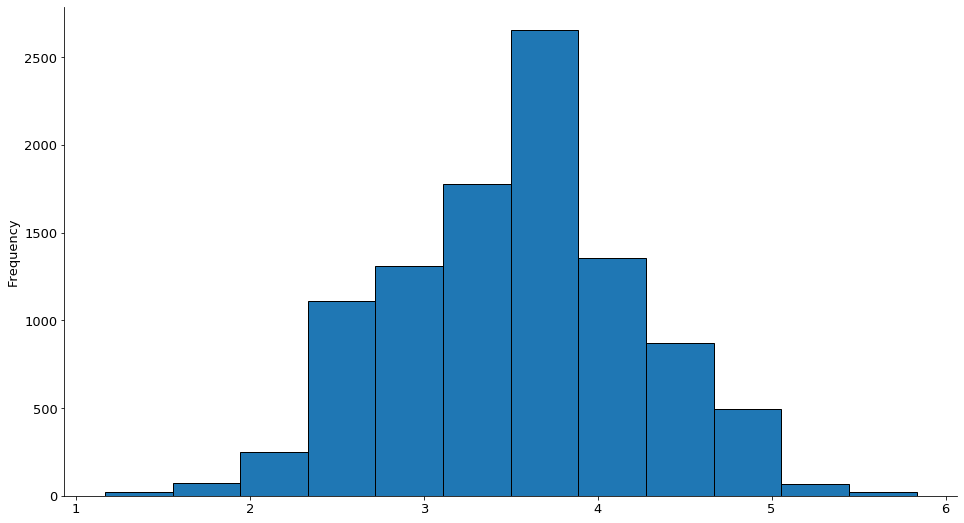

In [81]:
calculated_rolls.plot.hist(bins=12)
# The distribution of one dice roll is a uniform distribution.
# The chart appears to have more of a normal distribution.

### One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [84]:
se = math.sqrt((.25 * .75) / n)
print(se)
print(calculated_winrates.std())

0.08660254037844387
0.08556033562991155


In [85]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

In [86]:
stats.norm(mean, sd).cdf(.2)

0.2793555809916071

### For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

Are the average grades in web development vs data science classes different?

In [87]:
# null hypothesis: The average grades in web development vs data science are not different
# alternative hypothesis: Average grades in data science are higher than web dev
# true positive: Average grades in data science are higher than web dev
# false positive: We conclude the average grade in data science is higher than web dev when they are the same
# false negative: We conclude the average grades are the same despite the average grades being different
# true negative: We conclude the average grades are not different and in reality they are not different

Has the network latency gone up since we switched internet service providers?

In [ ]:
# null hypothesis: The network latency has not gone up since we switched service provider
# alternative hypothesis: The network latency has gone up since we switched service provider.
# true positive: We conclude the latency has gone up due to service provider and it really has
# false positive: We conclude the latency has gone up due to service provider when it really hasn't
# false negative: We conclude the latency hasn't gone up due to service provider when it really has
# true negative: We conclude the latency hasn't gone up due to service provider and it really hasn't

Is the website redesign any good?

In [ ]:
# null hypothesis: the website redisgn had no effect
# alternative hypothesis: people like the website redeisgn
# true positive: we conclude the redesign had an effect and it really did
# false positive: we conclude the redesign had an effect when it really didn't
# false negative: we conclude the redesign didn't have an effect when it did
# true negative we conclude the redesign had no effect and it really didn't

Is our television ad driving more sales?

In [ ]:
# null hypothesis: the ad had no effect on sales
# alternative hypothesis: sales went up after the ad
# true positive: we conclude the ad had an effect and it really did
# false positive: we conclude the ad had an effect and it really didn't
# false negative: we conclude the ad had no effect and it really did
# true negative: we conclude the ad had no effect and it really didn't

### Load the mpg dataset and use it to answer the following questions:

In [156]:
from pydataset import data
mpg = data('mpg')

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [157]:
mpg = mpg.assign(mpg_avg = (mpg.cty + mpg.hwy) / 2)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg_avg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [97]:
cars99 = mpg[mpg.year == 1999].mpg_avg
cars08 = mpg[mpg.year == 2008].mpg_avg

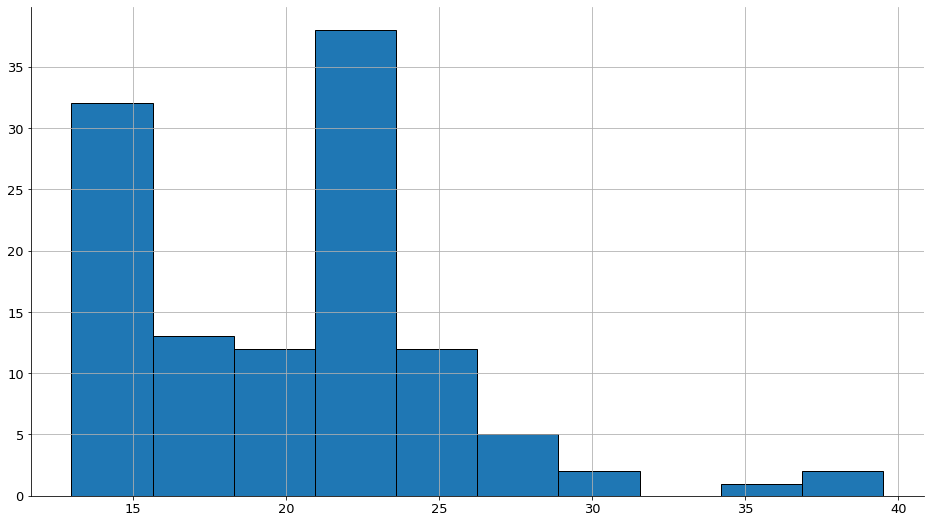

In [99]:
cars99.hist()

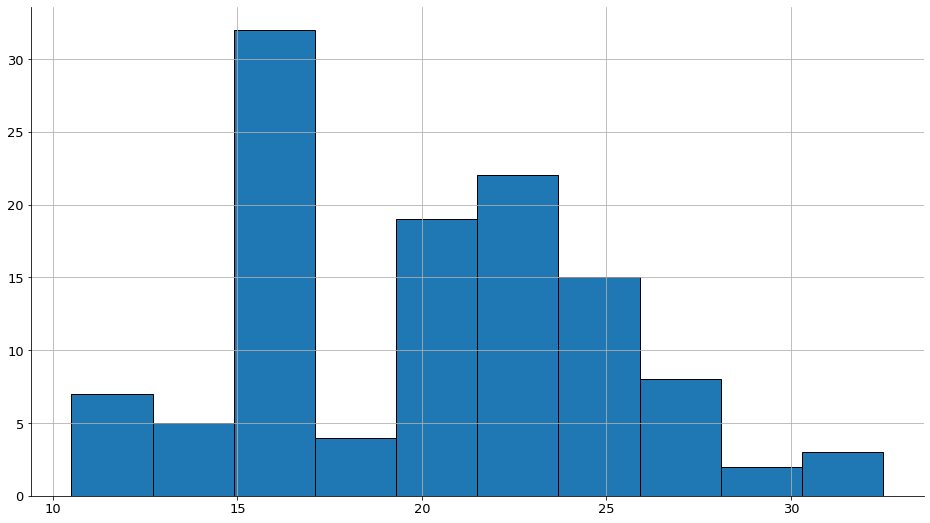

In [100]:
cars08.hist()

In [101]:
print(cars99.var())
print(cars08.var())

27.122605363984682
24.097480106100797


In [106]:
t, p = stats.ttest_ind(cars99, cars08, equal_var = True)

In [107]:
print(f't: {t}, p: {p}')

t: 0.21960177245940962, p: 0.8263744040323578


In [177]:
alpha = .05
if p > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


### Are compact cars more fuel-efficient than the average car?

In [165]:
compact = mpg[mpg['class'] == 'compact'].mpg_avg
normal = mpg.mpg_avg

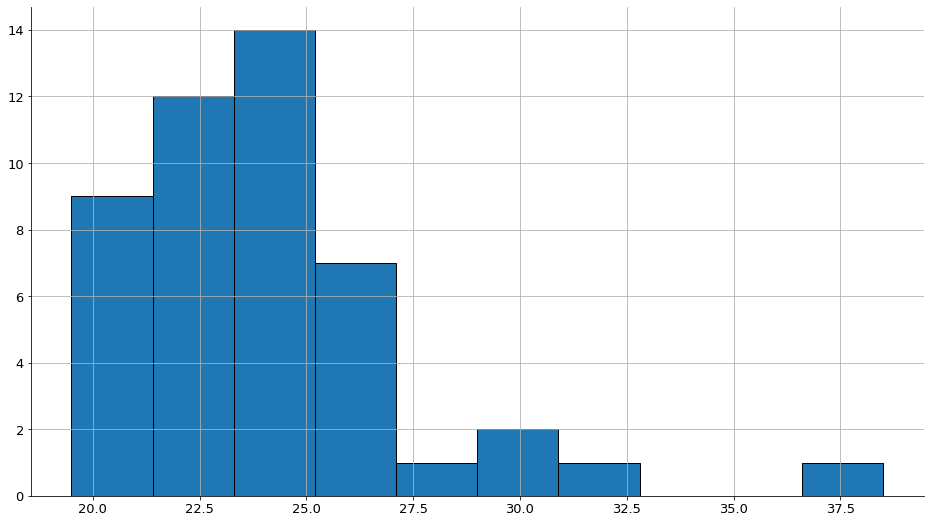

In [159]:
compact.hist()

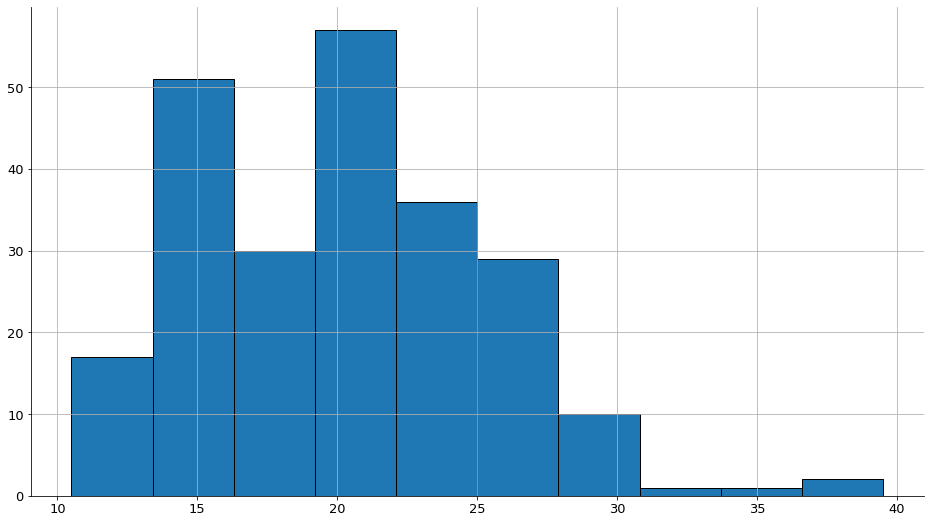

In [160]:
normal.hist()

In [204]:
t, p = stats.ttest_1samp(compact, normal.mean())

In [205]:
print(f't: {t}, p: {p}')

t: 7.896888573132535, p: 4.1985637943171336e-10


In [206]:
alpha = .05
if p > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


### Do manual cars get better gas mileage than automatic cars?

In [168]:
mpg['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')

In [173]:
auto_mpg = mpg[mpg['trans_cat'] == 'auto'].mpg_avg
man_mpg = mpg[mpg['trans_cat'] == 'manual'].mpg_avg

In [174]:
t, p = stats.ttest_ind(man_mpg, auto_mpg)
print('t: ', t)
print('p: ', p)

t:  4.593437735750014
p:  7.154374401145683e-06


In [207]:
alpha = .05
if p > alpha:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? 

In [193]:
from env import username, password, host

In [196]:
url = f'mysql+pymysql://{username}:{password}@{host}/telco_churn'
telco = pd.read_sql('SELECT * FROM customers JOIN internet_service_types USING(internet_service_type_id)', url)
telco = telco[telco.total_charges !='']
telco = telco[telco.total_charges != ' ']
telco.total_charges = telco.total_charges.astype(float)

In [199]:
a = .05
x = telco.tenure
y = telco.monthly_charges

In [200]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.2468617666408935, 3.9898213232673846e-98)

In [209]:
y = telco.total_charges
corr, p = stats.pearsonr(x, y)
corr, p

(0.8258804609332021, 0.0)

In [210]:
if p > a:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


### What happens if you control for phone and internet service?

In [211]:
telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64

In [212]:
telco_has_internet = telco[telco.internet_service_type != 'None']
telco_no_internet = telco[telco.internet_service_type == 'None']

In [214]:
alpha = .05
r, p = stats.pearsonr(telco_has_internet.tenure, telco_has_internet.monthly_charges)
r, p

(0.37203919761332416, 1.6186841401711697e-180)

In [216]:
r, p = stats.pearsonr(telco_no_internet.tenure, telco_no_internet.monthly_charges)
r, p

(0.34618773548574655, 4.896604599951957e-44)